In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# prompt: print number of images in each classes

from google.colab import drive
import os



image_dir = '/content/drive/MyDrive/dataset.csv/Animals'  # Replace with your actual directory and enclose the path in quotes

class_counts = {}
for root, dirs, files in os.walk(image_dir):
  for file in files:
    if file.endswith(('.jpg', '.png', '.jpeg')):
      class_name = os.path.basename(root)
      if class_name not in class_counts:
        class_counts[class_name] = 0
      class_counts[class_name] += 1

for class_name, count in class_counts.items():
  print(f"Class: {class_name}, Number of images: {count}")

Class: Lion, Number of images: 32
Class: Leopard, Number of images: 31
Class: Jaguar, Number of images: 30
Class: Cheetah, Number of images: 38
Class: Tiger, Number of images: 39


In [9]:
from sklearn.preprocessing import LabelEncoder
# Load images and labels
images = []
labels = []

# Iterate through each class folder
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(root, file)
            # Read and resize the image
            img = cv2.imread(image_path)
            img = cv2.resize(img, (128, 128))  # Resize to a standard size (e.g., 64x64)
            img = img.flatten()  # Flatten the image into a 1D vector
            images.append(img)

            # Extract label from folder name (class name)
            label = os.path.basename(root)
            labels.append(label)

# Convert images to numpy array
X = np.array(images)

# Encode labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Optionally normalize images
X = X / 255.0  # Normalize pixel values to [0, 1]

# Check the shapes
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (170, 49152), Labels shape: (170,)


In [27]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold from sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier # Import the KNeighborsClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Set up the 5-fold cross-validation procedure
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies for each value of K (1 to 30)
accuracies = {k: [] for k in range(1, 31)}  # We will test for k = 1 to 30

In [16]:
# Loop over values of K from 1 to 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # k-NN classifier with Euclidean distance

    fold_accuracies = []  # To store accuracies for the current value of k

    # Perform 5-fold cross-validation
    for train_index, test_index in kf.split(X, y):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the k-NN classifier
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Calculate accuracy for the current fold
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

    # Store the average accuracy for this k
    accuracies[k] = np.mean(fold_accuracies)

# Print the average accuracy for each value of k
for k, accuracy in accuracies.items():
    print(f"Average accuracy for k={k}: {accuracy:.4f}")


Average accuracy for k=1: 0.2353
Average accuracy for k=2: 0.2118
Average accuracy for k=3: 0.2000
Average accuracy for k=4: 0.2353
Average accuracy for k=5: 0.2647
Average accuracy for k=6: 0.2529
Average accuracy for k=7: 0.2412
Average accuracy for k=8: 0.2294
Average accuracy for k=9: 0.2471
Average accuracy for k=10: 0.2353
Average accuracy for k=11: 0.2529
Average accuracy for k=12: 0.2706
Average accuracy for k=13: 0.2647
Average accuracy for k=14: 0.2588
Average accuracy for k=15: 0.3000
Average accuracy for k=16: 0.3059
Average accuracy for k=17: 0.3118
Average accuracy for k=18: 0.2706
Average accuracy for k=19: 0.2706
Average accuracy for k=20: 0.2941
Average accuracy for k=21: 0.2706
Average accuracy for k=22: 0.2706
Average accuracy for k=23: 0.2706
Average accuracy for k=24: 0.2765
Average accuracy for k=25: 0.2647
Average accuracy for k=26: 0.2647
Average accuracy for k=27: 0.2882
Average accuracy for k=28: 0.3000
Average accuracy for k=29: 0.2824
Average accuracy for k=

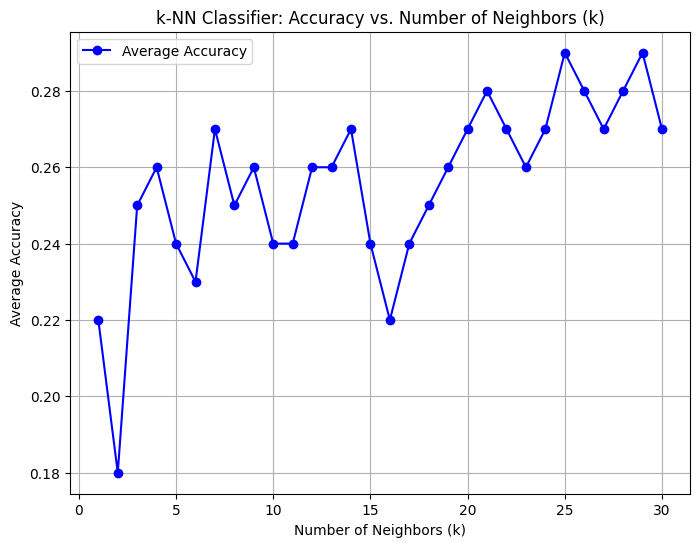

In [32]:

# Extract k values and their corresponding average accuracies
k_values = list(accuracies.keys())
mean_accuracies = list(accuracies.values())

# Plot the accuracy vs. k graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b', label="Average Accuracy")
plt.title("k-NN Classifier: Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.legend()
plt.show()